In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import wget
import seaborn as sns
import ipywidgets as pywidgets
import urllib3

from io import StringIO
from ipywidgets import interact
from itertools import combinations

# Download data

In [3]:
http = urllib3.PoolManager()
with http.request('GET', 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', preload_content=False) as r:
    data = r.data.decode('utf-8')
    dataframe = pd.read_csv(StringIO(data), sep=';')

/home/kacper/anaconda3/lib/python3.6/site-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [4]:
dataframe = dataframe.drop(columns=['quality'])
dataframe

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5             0.500         0.36             6.1      0.071   
12              5.6             0.615         0.00             1.6      0.089   
13              7.8             0.610         0.29             1.6      0.114   
14              8.9             0.620         0.18             3.8      0.176   
15              8.9             0.620         0.19             3.9      0.170   
16              8.5             0.280         0.56             1.8      0.092   
17              8.1             0.560         0.28             1.7      0.368   
18              7.4             0.590         0.08             4.4      0.086   
19              7.9             0.320         0.51             1.8      0.341   
20              8.9             0.220         0.48             1.8      0.077   
21              7.6             0.390         0.31             2.3      0.082   
22              7.9             0.430         0.21             1.6      0.106   
23              8.5             0.490         0.11             2.3      0.084   
24              6.9             0.400         0.14             2.4      0.085   
25              6.3             0.390         0.16             1.4      0.080   
26              7.6             0.410         0.24             1.8      0.080   
27              7.9             0.430         0.21             1.6      0.106   
28              7.1             0.710         0.00             1.9      0.080   
29              7.8             0.645         0.00             2.0      0.082   
...             ...               ...          ...             ...        ...   
1569            6.2             0.510         0.14             1.9      0.056   
1570            6.4             0.360         0.53             2.2      0.230   
1571            6.4             0.380         0.14             2.2      0.038   
1572            7.3             0.690         0.32             2.2      0.069   
1573            6.0             0.580         0.20             2.4      0.075   
1574            5.6             0.310         0.78            13.9      0.074   
1575            7.5             0.520         0.40             2.2      0.060   
1576            8.0             0.300         0.63             1.6      0.081   
1577            6.2             0.700         0.15             5.1      0.076   
1578            6.8             0.670         0.15             1.8      0.118   
1579            6.2             0.560         0.09             1.7      0.053   
1580            7.4             0.350         0.33             2.4      0.068   
1581            6.2             0.560         0.09             1.7      0.053   
1582            6.1             0.715         0.10             2.6      0.053   
1583            6.2             0.460         0.29             2.1      0.074   
1584            6.7             0.320         0.44             2.4      0.061   
1585            7.2             0.390         0.44             2.6      0.066   
1586            7.5             0.310

In [5]:
dataframe.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol  
count  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983  
std       0.154386     0.169507     1.065668  
min       2.740000     0.330000     8.400000  
25%       3.210000     0.550000     9.500000  
50%       3.310000     0.620000    10.200000  
75%       3.400000     0.730000    11.100000  
max       4.010000     2.000000    14.900000

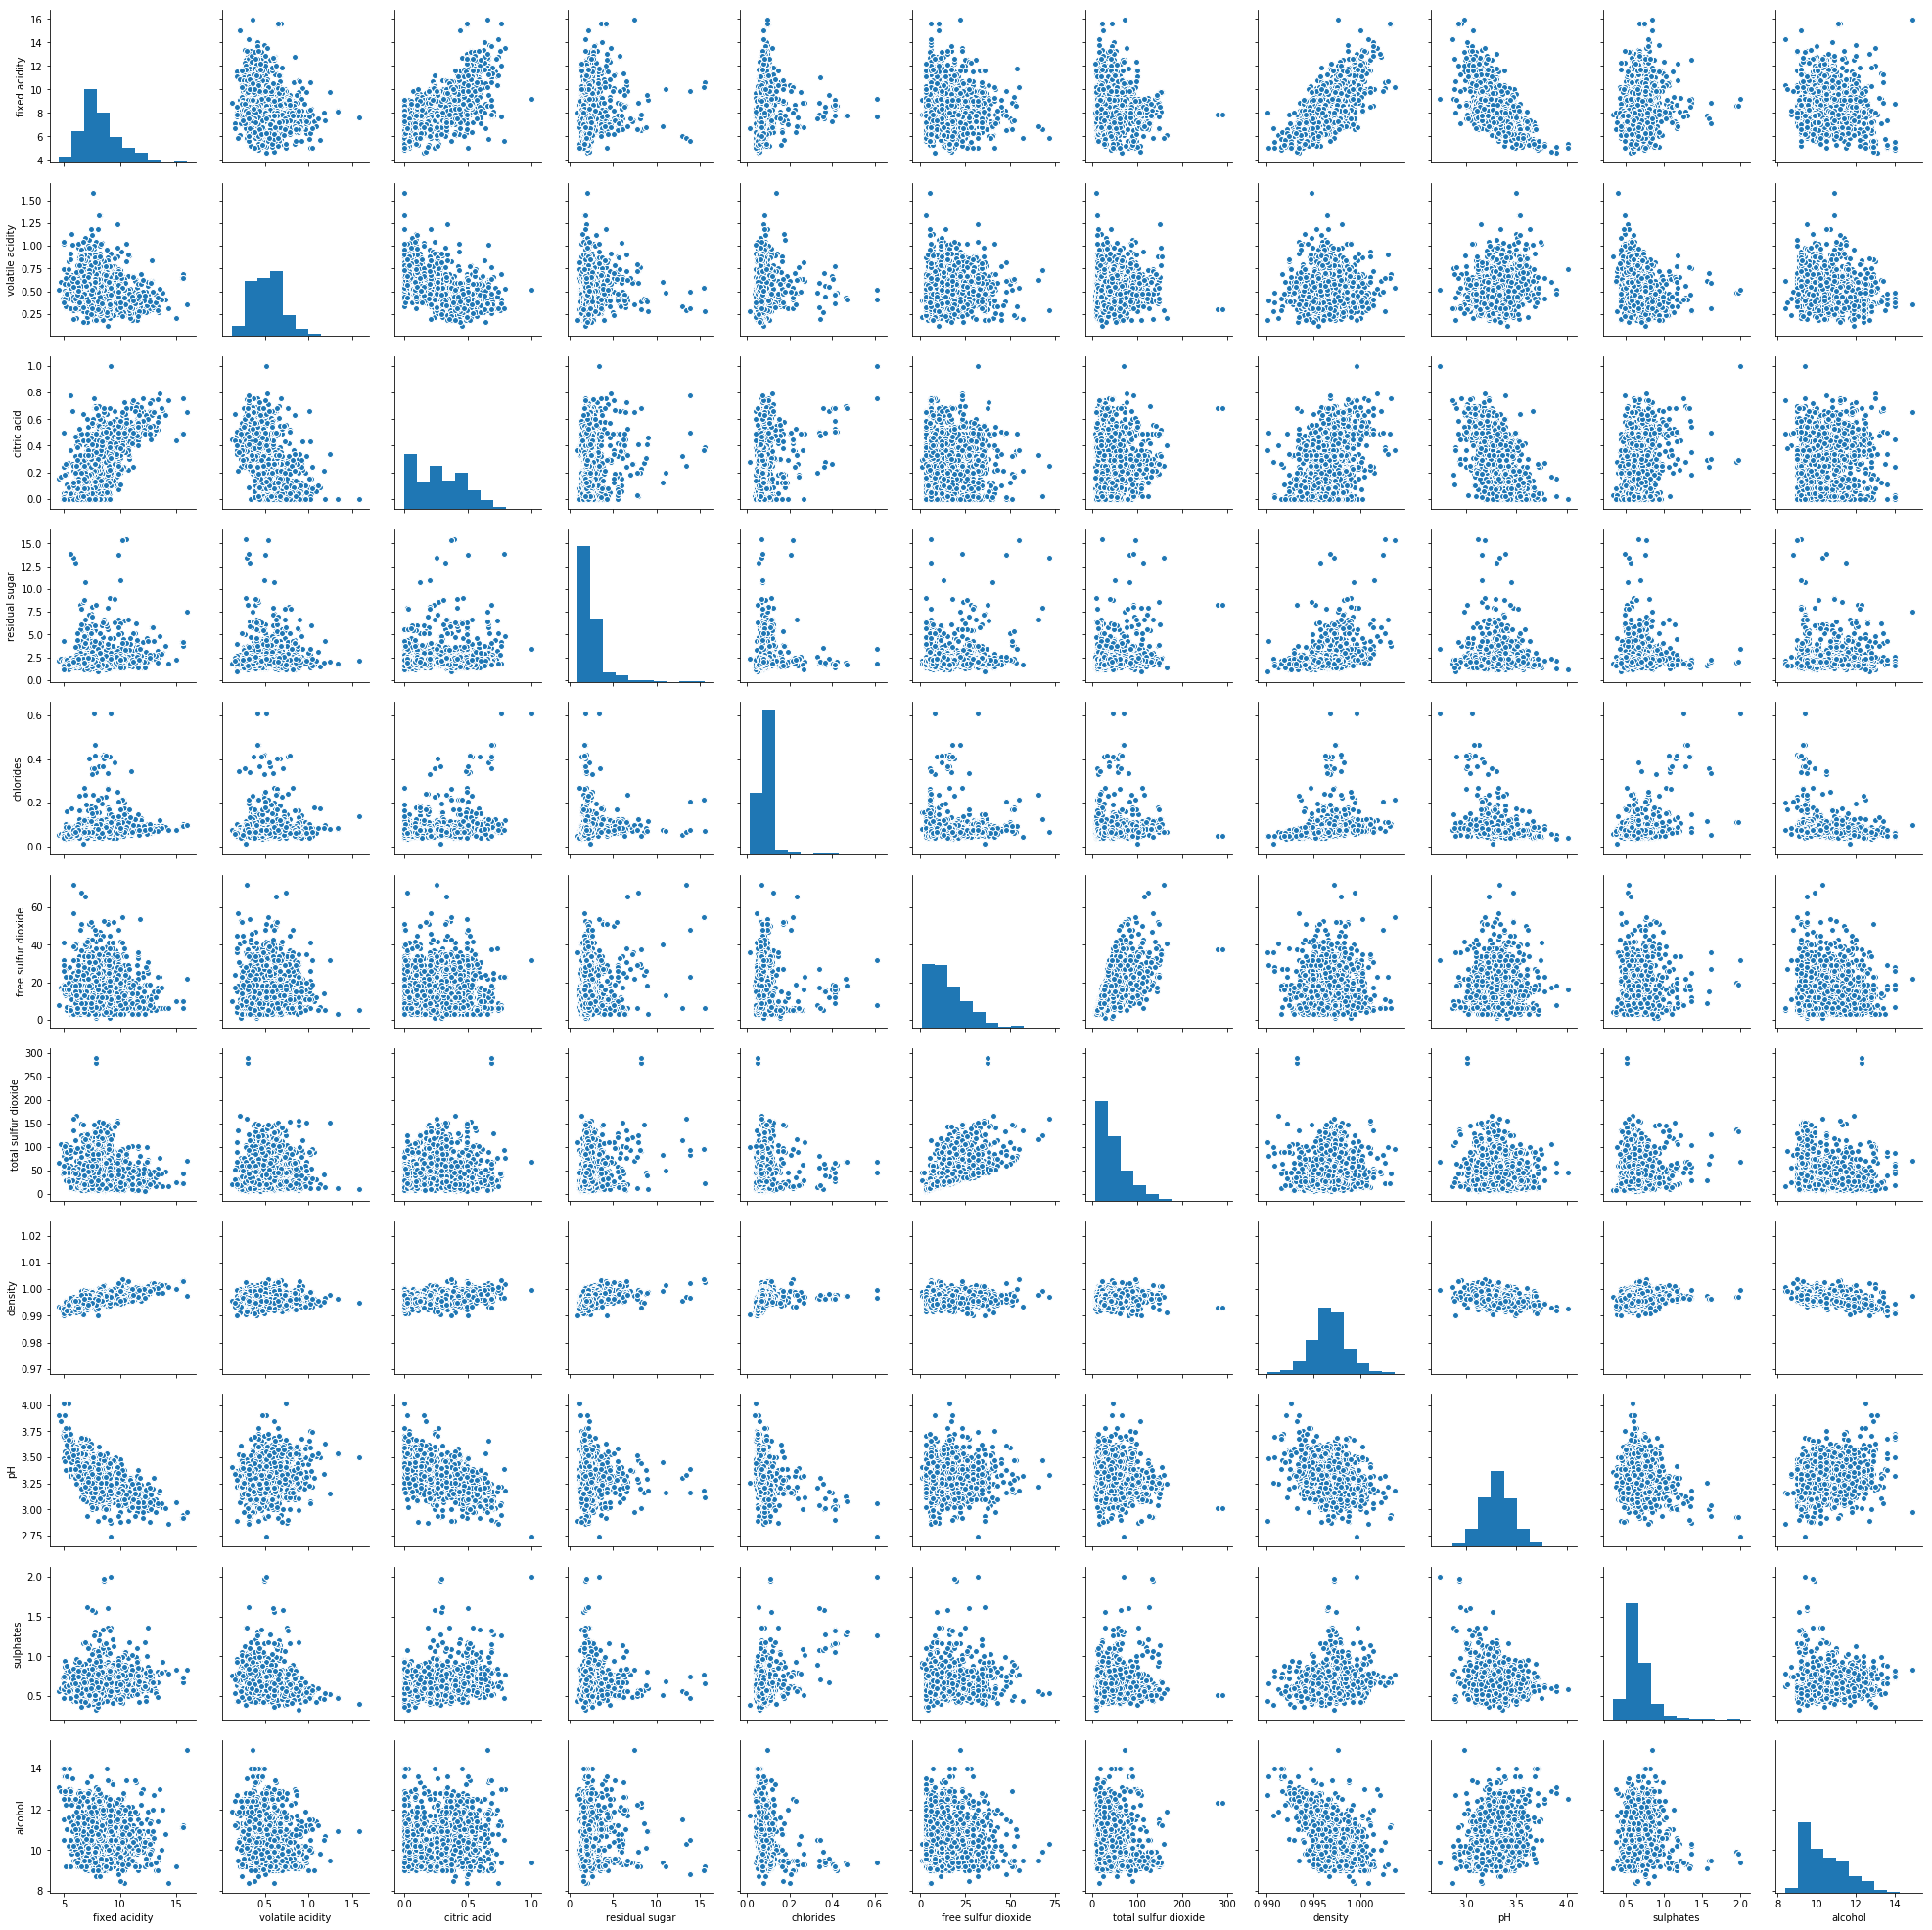

In [6]:
sns.pairplot(dataframe)

In [7]:
columns = list(dataframe.columns)
dropdown_1 = pywidgets.Dropdown(
    options=columns,
    value=columns[0],
    description='Column 1:',
    disabled=False,
)
dropdown_2 = pywidgets.Dropdown(
    options=columns,
    value=columns[1],
    description='Column 2:',
    disabled=False,
)

In [8]:
@interact(column_1=dropdown_1, column_2=dropdown_2)
def plot_jointly(column_1, column_2):
    sns.jointplot(x=column_1, y=column_2, data=dataframe)

interactive(children=(Dropdown(description='Column 1:', options=('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'), value='fixed acidity'), Dropdown(description='Column 2:', index=1, options=('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'), value='volatile acidity'), Output()), _dom_classes=('widget-interact',))

In [9]:
dataframe.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.114777   0.093705            -0.153794   
volatile acidity            0.001918   0.061298            -0.010504   
citric acid                 0.143577   0.203823            -0.060978   
residual sugar              1.000000   0.055610             0.187049   
chlorides                   0.055610   1.000000             0.005562   
free sulfur dioxide         0.187049   0.005562             1.000000   
total sulfur dioxide        0.203028   0.047400             0.667666   
density                     0.355283   0.200632            -0.021946   
pH                         -0.085652  -0.265026             0.070377   
sulphates                   0.005527   0.371260             0.051658   
alcohol                     0.042075  -0.221141            -0.069408   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113181  0.668047 -0.682978   0.183006   
volatile acidity                  0.076470  0.022026  0.234937  -0.260987   
citric acid                       0.035533  0.364947 -0.541904   0.312770   
residual sugar                    0.203028  0.355283 -0.085652   0.005527   
chlorides                         0.047400  0.200632 -0.265026   0.371260   
free sulfur dioxide               0.667666 -0.021946  0.070377   0.051658   
total sulfur dioxide              1.000000  0.071269 -0.066495   0.042947   
density                           0.071269  1.000000 -0.341699   0.148506   
pH                               -0.066495 -0.341699  1.000000  -0.196648   
sulphates                         0.042947  0.148506 -0.196648   1.000000   
alcohol                          -0.205654 -0.496180  0.205633   0.093595   

                       alcohol  
fixed acidity        -0.061668  
volatile acidity     -0.202288  
citric acid           0.109903  
residual sugar        0.042075  
chlorides            -0.221141  
free sulfur dioxide  -0.069408  
total sulfur dioxide -0.205654  
density              -0.496180  
pH                    0.205633  
sulphates             0.093595  
alcohol               1.000000

In [11]:
dataframe.cov()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              3.031416         -0.079851     0.227820   
volatile acidity          -0.079851          0.032062    -0.019272   
citric acid                0.227820         -0.019272     0.037947   
residual sugar             0.281756          0.000484     0.039434   
chlorides                  0.007679          0.000517     0.001869   
free sulfur dioxide       -2.800921         -0.019674    -0.124252   
total sulfur dioxide      -6.482346          0.450426     0.227697   
density                    0.002195          0.000007     0.000134   
pH                        -0.183586          0.006495    -0.016298   
sulphates                  0.054010         -0.007921     0.010328   
alcohol                   -0.114421         -0.038600     0.022815   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.281756   0.007679            -2.800921   
volatile acidity            0.000484   0.000517            -0.019674   
citric acid                 0.039434   0.001869            -0.124252   
residual sugar              1.987897   0.003690             2.758611   
chlorides                   0.003690   0.002215             0.002738   
free sulfur dioxide         2.758611   0.002738           109.414884   
total sulfur dioxide        9.416441   0.073387           229.737521   
density                     0.000945   0.000018            -0.000433   
pH                         -0.018644  -0.001926             0.113653   
sulphates                   0.001321   0.002962             0.091592   
alcohol                     0.063219  -0.011092            -0.773698   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -6.482346  0.002195 -0.183586   0.054010   
volatile acidity                  0.450426  0.000007  0.006495  -0.007921   
citric acid                       0.227697  0.000134 -0.016298   0.010328   
residual sugar                    9.416441  0.000945 -0.018644   0.001321   
chlorides                         0.073387  0.000018 -0.001926   0.002962   
free sulfur dioxide             229.737521 -0.000433  0.113653   0.091592   
total sulfur dioxide           1082.102373  0.004425 -0.337699   0.239471   
density                           0.004425  0.000004 -0.000100   0.000048   
pH                               -0.337699 -0.000100  0.023835  -0.005146   
sulphates                         0.239471  0.000048 -0.005146   0.028733   
alcohol                          -7.209298 -0.000998  0.033832   0.016907   

                       alcohol  
fixed acidity        -0.114421  
volatile acidity     -0.038600  
citric acid           0.022815  
residual sugar        0.063219  
chlorides            -0.011092  
free sulfur dioxide  -0.773698  
total sulfur dioxide -7.209298  
density              -0.000998  
pH                    0.033832  
sulphates             0.016907  
alcohol               1.135647